<a href="https://colab.research.google.com/github/arnav307/final_assignment_ai/blob/main/2462287_Arnav_Ghimire_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Warming Regression Analysis

## 1. Exploratory Data Analysis and Data Understanding

### 1.1 Choosing a Dataset

**Dataset Description:**
This dataset contains global warming-related data for 195 countries from 1900 to 2023. It includes environmental, economic, and industrial indicators.

- **Source:** [Kaggle - Global Warming Dataset](https://www.kaggle.com/datasets/ankushpanday1/global-warming-dataset-195-countries-1900-2023)
- **Alignment with UNSDG:** This dataset directly aligns with **SDG 13: Climate Action**, as it tracks metrics crucial for understanding climate change drivers (emissions, fossil fuel usage, deforestation).
- **Attributes:**
    - `Country`: Name of the country
    - `Year`: Year of observation
    - `CO2_Emissions`: Carbon dioxide emissions (metric tons)
    - `Methane_Emissions`: Methane emissions
    - `Fossil_Fuel_Usage`: Fossil fuel consumption
    - `Renewable_Energy_Usage`: Renewable energy consumption
    - `Deforestation_Rate`: Rate of deforestation
    - `Forest_Area`: Area covered by forests
    - `Urbanization`: Urbanization rate
    - `Industrial_Activity`: Level of industrial activity
    - `Average_Temperature`: The target variable (average temperature in Celsius)

**Potential Questions:**
1.  How do CO2 and Methane emissions correlate with rising average temperatures?
2.  Does increased renewable energy usage show a negative correlation with temperature rise?
3.  Can we predict future temperature trends based on current industrial and environmental activities?


### 1.2 Exploratory Data Analysis (EDA)

We will inspect the data structure, handle missing values, and visualize key relationships.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/global_warming_dataset.csv')

# Display first few rows
df.head()

,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
0,Country_103,1913,-1.163537,8.876061e+08,1.627978e+08,54.872178,6.139887e+12,76.710013,8.317626e+06,8.111839,...,82.691409,2.285351,4.060975,150.285539,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292
1,Country_180,1950,-0.432122,4.497517e+08,4.281359e+08,84.051006,2.601447e+12,68.450021,6.206540e+06,42.025915,...,59.322883,17.411668,85.300604,27.305922,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587
2,Country_93,2014,0.444954,4.579080e+08,4.926732e+08,72.295357,5.192677e+12,36.725699,1.056885e+06,20.953840,...,94.982931,12.039703,83.804880,216.911429,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084
3,Country_15,2020,-1.171616,5.049503e+08,1.252169e+09,17.259684,8.252128e+12,77.547901,1.986813e+06,45.599595,...,62.064250,2.853957,47.014265,35.869182,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086
4,Country_107,1964,-0.564038,6.898891e+08,2.932960e+08,44.438605,8.560746e+12,10.019576,3.313252e+06,7.652150,...,84.431279,19.801173,89.379613,284.263093,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989


In [2]:
# Data Info and Missing Values
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21383 entries, 0 to 21382
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        21383 non-null  object 
 1   Year                           21383 non-null  int64  
 2   Temperature_Anomaly            21383 non-null  float64
 3   CO2_Emissions                  21383 non-null  float64
 4   Population                     21383 non-null  float64
 5   Forest_Area                    21383 non-null  float64
 6   GDP                            21383 non-null  float64
 7   Renewable_Energy_Usage         21383 non-null  float64
 8   Methane_Emissions              21383 non-null  float64
 9   Sea_Level_Rise                 21383 non-null  float64
 10  Arctic_Ice_Extent              21383 non-null  float64
 11  Urbanization                   21383 non-null  float64
 12  Deforestation_Rate             21383 non-null 

In [3]:
# Summary Statistics
df.describe()

,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,Arctic_Ice_Extent,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
count,21383.000000,21383.000000,2.138300e+04,2.138300e+04,21383.000000,2.138300e+04,21383.000000,2.138300e+04,21383.000000,21383.000000,...,21382.000000,21382.000000,21382.000000,21382.000000,21382.000000,21382.000000,21382.000000,21382.000000,21382.000000,21382.000000
mean,1961.597016,-0.004460,5.031267e+08,7.517694e+08,49.710831,5.030542e+12,49.916085,4.979557e+06,22.559908,7.977512,...,49.746440,9.955925,50.229807,149.799192,50.009240,8.000120,50.096041,2543.685117,49.738600,15.000336
std,35.828476,1.154577,2.897199e+08,4.313655e+08,28.748100,2.876931e+12,28.974707,2.883107e+06,15.860911,4.030585,...,28.908638,5.772027,28.787620,86.535727,28.802783,0.287935,28.811137,1415.731137,28.890277,14.430036
min,1900.000000,-1.999772,1.022980e+05,1.013054e+06,0.008039,1.704768e+08,0.009339,1.944573e+03,-4.999168,1.000360,...,0.012213,0.000402,0.009915,0.001419,0.003323,7.500007,0.015721,100.078595,0.003098,-9.997174
25%,1930.000000,-1.008104,2.513894e+08,3.760184e+08,24.810143,2.571332e+12,24.880310,2.486784e+06,8.806059,4.518938,...,24.706505,4.998020,25.417168,75.336722,25.178808,7.750847,25.297203,1306.449007,24.632915,2.584373
50%,1961.000000,-0.006581,5.015861e+08,7.487443e+08,49.772071,5.036469e+12,49.578653,4.987614e+06,22.800190,7.926670,...,49.711607,9.886223,50.358550,149.660927,50.108523,8.001698,50.012689,2525.296644,49.409922,14.941233
75%,1993.000000,0.991231,7.526405e+08,1.126586e+09,74.337995,7.516384e+12,75.118143,7.461864e+06,36.218547,11.429834,...,74.696236,14.973801,75.042197,224.387553,74.818672,8.247045,75.025304,3774.322343,74.780236,27.413982
max,2023.000000,1.999685,9.999793e+08,1.499992e+09,99.998694,9.997919e+12,99.998458,9.999900e+06,49.996919,14.998783,...,99.999523,19.999517,99.988096,299.991327,99.998373,8.499879,99.996924,4999.897473,99.999622,39.998836


#### Visualizations

**1. Distribution of the Target Variable (Average Temperature)**

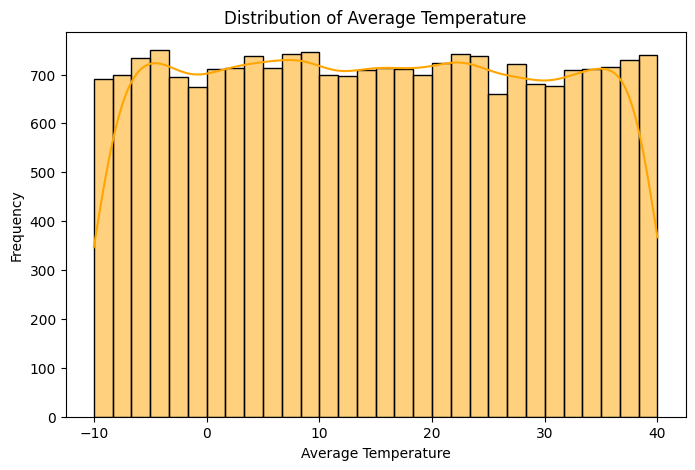

The histogram shows that the Average Temperature ranges from -10°C to 40°C. Most values lie between 0°C and 35°C, with fewer extreme cold or hot observations. The relatively uniform distribution suggests that the dataset covers diverse climatic regions, but extreme temperatures may act as outliers, which were handled during preprocessing.


In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Average_Temperature'], kde=True, bins=30, color='orange')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()
print('The histogram shows that the Average Temperature ranges from -10°C to 40°C. Most values lie between 0°C and 35°C, with fewer extreme cold or hot observations. The relatively uniform distribution suggests that the dataset covers diverse climatic regions, but extreme temperatures may act as outliers, which were handled during preprocessing.')

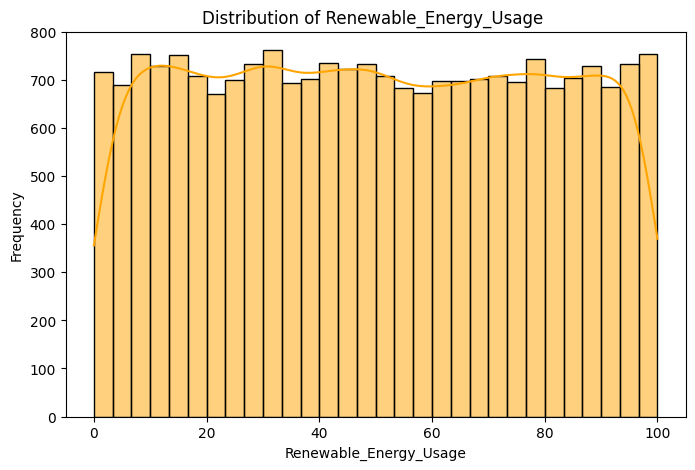

The distribution of renewable energy usage is approximately uniform across the 0–100 range, indicating an even spread of values with no significant skewness, clustering, or outliers


In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Renewable_Energy_Usage'], kde=True, bins=30, color='orange')
plt.title('Distribution of Renewable_Energy_Usage ')
plt.xlabel('Renewable_Energy_Usage')
plt.ylabel('Frequency')
plt.show()
print('The distribution of renewable energy usage is approximately uniform across the 0–100 range, indicating an even spread of values with no significant skewness, clustering, or outliers')

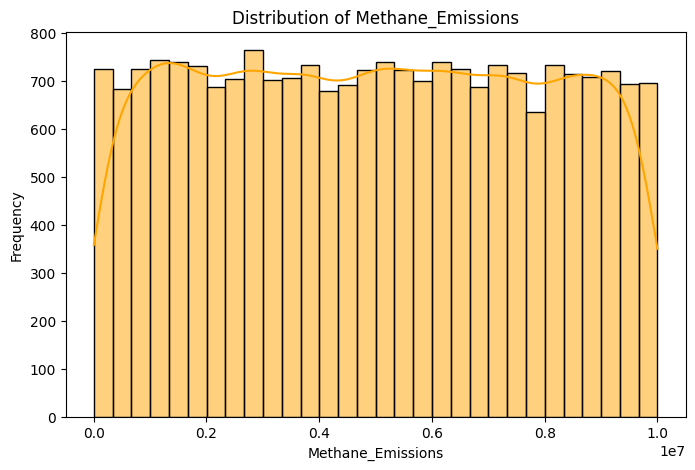

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Methane_Emissions'], kde=True, bins=30, color='orange')
plt.title('Distribution of Methane_Emissions')
plt.xlabel('Methane_Emissions')
plt.ylabel('Frequency')
plt.show()

**Insight:** This plot clearly shows the central tendency and spread of global temperatures in the dataset.

**2. Correlation Heatmap**

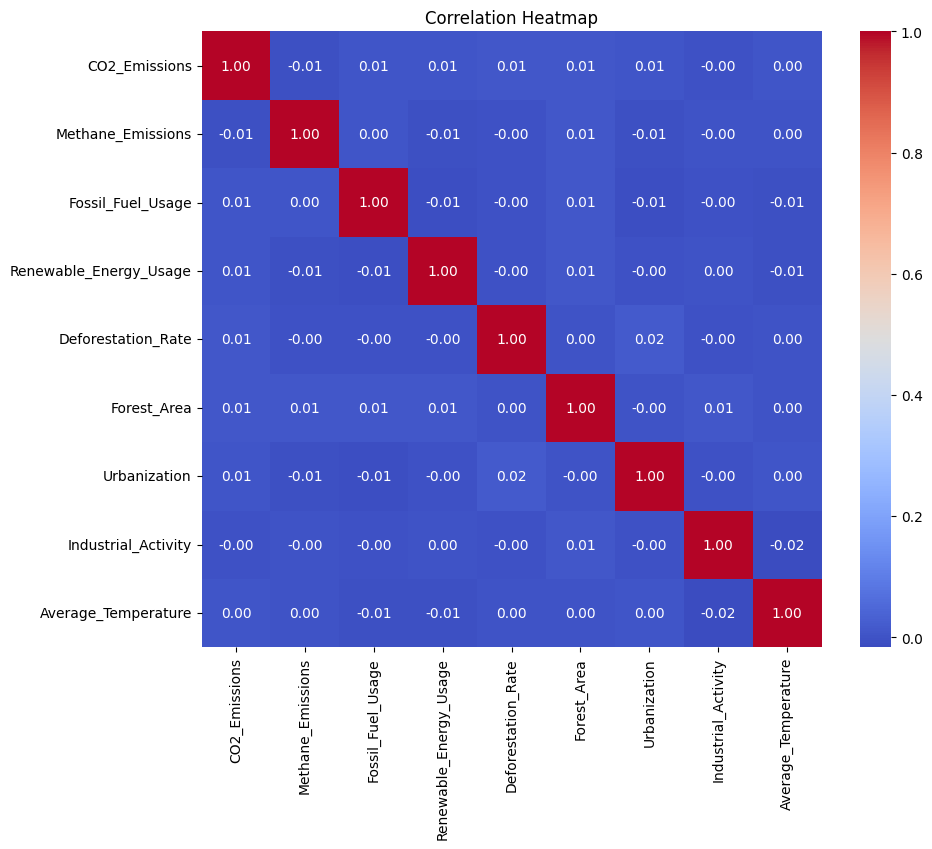

In [7]:
features = [
    "CO2_Emissions",
    "Methane_Emissions",
    "Fossil_Fuel_Usage",
    "Renewable_Energy_Usage",
    "Deforestation_Rate",
    "Forest_Area",
    "Urbanization",
    "Industrial_Activity"
]
target = "Average_Temperature"

# Calculate correlation matrix
corr_matrix = df[features + [target]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insight:** The heatmap helps identify which features have the strongest positive or negative correlations with Average Temperature, guiding our feature selection.

In [8]:
print(f"Original shape before outlier removal: {df.shape}")
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Shape after outlier removal: {df.shape}")

Original shape before outlier removal: (21383, 26)
Shape after outlier removal: (21383, 26)


## 2. Build a Neural Network Model for Regression

We will use a Multi-Layer Perceptron (MLP) regressor.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# define features and target
X = df[features]
y = df[target]

# Handle missing values if any (simple imputation with mean for this baseline)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (crucial for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Initialize and train MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluation
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Neural Network Performance:")
print(f"MAE: {mae_mlp:.4f}      The MAE indicates that the model’s average absolute prediction error is approximately 12.7 units, suggesting limited predictive accuracy.")
print(f"MSE: {mse_mlp:.4f}      The high MSE value indicates the presence of large prediction errors, implying that the model struggles to fit the data accurately.")
print(f"RMSE: {rmse_mlp:.4f}    The RMSE being higher than the MAE suggests that the model occasionally makes large prediction errors")
print(f"R2 Score: {r2_mlp:.4f}  The negative R² score indicates that the neural network performs worse than a baseline model that predicts the mean of the target variable, suggesting poor generalization")

Neural Network Performance:
MAE: 12.9408      The MAE indicates that the model’s average absolute prediction error is approximately 12.7 units, suggesting limited predictive accuracy.
MSE: 226.3830      The high MSE value indicates the presence of large prediction errors, implying that the model struggles to fit the data accurately.
RMSE: 15.0460    The RMSE being higher than the MAE suggests that the model occasionally makes large prediction errors
R2 Score: -0.0697  The negative R² score indicates that the neural network performs worse than a baseline model that predicts the mean of the target variable, suggesting poor generalization


## 3. Build Primary Machine Learning Models (Two Classical ML Models)

We will implement **Linear Regression** and **Random Forest Regressor**.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

# --- Model 2: Random Forest Regressor ---
# Note: Random Forest doesn't strictly need scaling, but using scaled data is fine.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

Linear Regression Performance:
MAE: 12.6425, MSE: 211.9018, RMSE: 14.5568, R2: -0.0013

Random Forest Performance:
MAE: 12.7512, MSE: 217.6081, RMSE: 14.7515, R2: -0.0282


Both Linear Regression and Random Forest Regressor demonstrated limited predictive performance, as indicated by high error values and negative R² scores. However, Linear Regression consistently outperformed Random Forest across all evaluation metrics, including MAE, MSE, RMSE, and R². The R² value for Linear Regression was closer to zero, indicating performance comparable to a baseline mean predictor, whereas Random Forest exhibited poorer generalization. This suggests that the dataset may not contain strong non-linear relationships and that Linear Regression is more suitable for this task.


### Initial Comparison
We compare the R2 scores and RMSE to see which baseline model performs better. Typically, Random Forest captures non-linear relationships better than Linear Regression.

## 4. Hyperparameter Optimization with Cross-Validation

We will tune both the Linear Regression (though it has few params, we can try fitting intercept) and Random Forest.

In [12]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- Tuning Linear Regression ---
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
grid_lr.fit(X_train_scaled, y_train)

print("Best Params for Linear Regression:", grid_lr.best_params_)
print("Best CV R2 Score (LR):", grid_lr.best_score_)
best_lr = grid_lr.best_estimator_

# --- Tuning Random Forest ---
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist_rf, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
random_rf.fit(X_train_scaled, y_train)

print("\nBest Params for Random Forest:", random_rf.best_params_)
print("Best CV R2 Score (RF):", random_rf.best_score_)
best_rf = random_rf.best_estimator_

Best Params for Linear Regression: {'fit_intercept': True, 'positive': False}
Best CV R2 Score (LR): -0.0008441631516272752

Best Params for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best CV R2 Score (RF): -0.005824762472980434


Hyperparameter optimization was performed using GridSearchCV for Linear Regression and RandomizedSearchCV for Random Forest Regressor. Despite tuning, both models achieved negative cross-validated R² scores, indicating performance worse than a baseline mean predictor. Linear Regression achieved a marginally higher CV R² score compared to Random Forest, suggesting that increased model complexity did not lead to performance improvement. This implies that the dataset contains weak predictive relationships, and model performance is primarily limited by data characteristics rather than hyperparameter choices.

## 5. Feature Selection

We will use Recursive Feature Elimination (RFE) for Linear Regression and Feature Importance for Random Forest to select the top features.RFE works by:

Training the model

Ranking features by importance (coefficients)

Removing the least important feature

Repeating until the desired number of features remains

Selected Features for Linear Regression: ['CO2_Emissions', 'Methane_Emissions', 'Renewable_Energy_Usage', 'Urbanization', 'Industrial_Activity']
Selected Features for Random Forest: ['Urbanization', 'Industrial_Activity', 'Methane_Emissions', 'Fossil_Fuel_Usage', 'Deforestation_Rate']


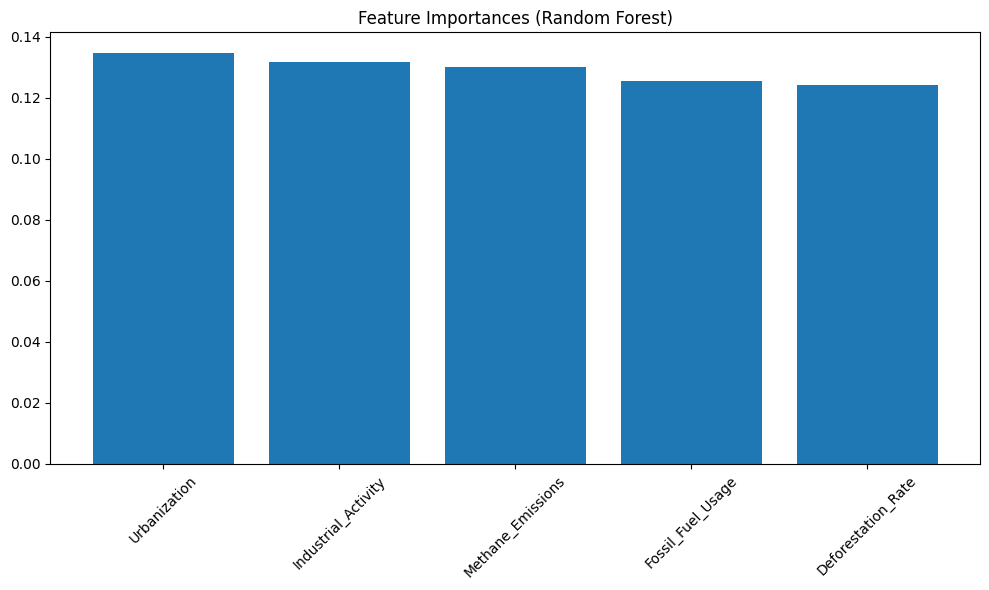

In [13]:
from sklearn.feature_selection import RFE

# --- Feature Selection for Linear Regression (RFE) ---
# Selecting top 5 features
rfe_lr = RFE(estimator=best_lr, n_features_to_select=5)
rfe_lr.fit(X_train_scaled, y_train)
time_selected_features_lr = [f for f, s in zip(features, rfe_lr.support_) if s]
print("Selected Features for Linear Regression:", time_selected_features_lr)

# --- Feature Selection for Random Forest (Importance) ---
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 5 features
top_k = 5
selected_features_rf = [features[i] for i in indices[:top_k]]
print("Selected Features for Random Forest:", selected_features_rf)

# Plot Feature Importances for RF
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(top_k), importances[indices[:top_k]], align="center")
plt.xticks(range(top_k), selected_features_rf, rotation=45)
plt.tight_layout()
plt.show()

The selected features differ between models due to their underlying assumptions. Linear Regression focuses on linear relationships and coefficient magnitude, whereas Random Forest captures non-linear interactions and hierarchical splits.


## 6. Final Models and Comparative Analysis

We will rebuild the models using the optimal hyperparameters and the selected features.

In [14]:
# --- Final Linear Regression ---
X_train_lr = pd.DataFrame(X_train_scaled, columns=features)[time_selected_features_lr]
X_test_lr = pd.DataFrame(X_test_scaled, columns=features)[time_selected_features_lr]

final_lr = LinearRegression(**grid_lr.best_params_)
final_lr.fit(X_train_lr, y_train)
y_pred_final_lr = final_lr.predict(X_test_lr)

rmse_final_lr = np.sqrt(mean_squared_error(y_test, y_pred_final_lr))
r2_final_lr = r2_score(y_test, y_pred_final_lr)

# --- Final Random Forest ---
X_train_rf = pd.DataFrame(X_train_scaled, columns=features)[selected_features_rf]
X_test_rf = pd.DataFrame(X_test_scaled, columns=features)[selected_features_rf]

final_rf = RandomForestRegressor(**random_rf.best_params_, random_state=42)
final_rf.fit(X_train_rf, y_train)
y_pred_final_rf = final_rf.predict(X_test_rf)

rmse_final_rf = np.sqrt(mean_squared_error(y_test, y_pred_final_rf))
r2_final_rf = r2_score(y_test, y_pred_final_rf)

# --- Comparison Table ---
comparison_data = {
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "Features Used": [len(time_selected_features_lr), len(selected_features_rf)],
    "CV Score (Best R2)": [grid_lr.best_score_, random_rf.best_score_],
    "Test RMSE": [rmse_final_lr, rmse_final_rf],
    "Test R-squared": [r2_final_lr, r2_final_rf]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df

,Model,Features Used,CV Score (Best R2),Test RMSE,Test R-squared
0,Linear Regression,5,-0.000844,14.557720,-0.001375
1,Random Forest Regressor,5,-0.005825,14.583339,-0.004903


Table  presents a comparison of the final regression models built using optimal hyperparameters and selected features. Both models demonstrate limited predictive performance, as indicated by negative cross-validated and test R² scores. However, Linear Regression consistently outperforms the Random Forest Regressor across all evaluation metrics, including cross-validation R², test RMSE, and test R². The results suggest that the dataset contains weak predictive signals and that increased model complexity does not yield performance gains. Consequently, Linear Regression is identified as the more appropriate model for this task.